In [1]:
using PyCall
using PyPlot
using FFTW
using LinearAlgebra
using JLD2
using YAML
# FFTW.set_num_threads(16)

@pyimport mpl_toolkits.axes_grid1 as axgrid
@pyimport matplotlib.font_manager as fm
@pyimport mpl_toolkits.axes_grid1.anchored_artists as ac
plt.style.use("dark_background")
# plt.style.use("default")
plt.rc("font", family="STIXGeneral")
plt.rc("font", size=22)
plt.rc("mathtext", fontset="stix")

mpl = pyimport("matplotlib")
np = pyimport("numpy")

config = YAML.load_file("../config.yaml")

Dict{Any, Any} with 16 entries:
  "DM_particle_mass_Dark" => 0.00472716
  "run_name"              => "density_cube_snap_099_full_1024_all_species"
  "xmin"                  => 0.0
  "num_scales"            => 10
  "GAS_particle_mass_TNG" => 0.000743736
  "output_directory"      => "/global/cscratch1/sd/james12/NEXUS_analysis/"
  "nx"                    => 1024
  "N_GAS"                 => 15625000000
  "num_snaps"             => 1
  "snapfile_root"         => 99
  "algorithm"             => "NEXUS+"
  "input_directory"       => "/global/cscratch1/sd/james12/Illustris_TNG_Data/T…
  "simulation_type"       => "All"
  "DM_particle_mass_TNG"  => 0.00398343
  "N_DM"                  => 15625000000
  "xmax"                  => 205000.0

# Let's Load in the Maximum Signatures

We load in maximum signatures from the NEXUS algorithm run of the Dark Matter only simulation with resolution $1024^3$

In [2]:
config["output_directory"] *"Full_Species_1024_snap_099/"* "max_sigs_" * config["run_name"] * "_NEXUSPLUS" * "_full_signatures.jld2"

"/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/max_sigs_density_cube_snap_099_full_1024_all_species_NEXUSPLUS_full_signatures.jld2"

In [3]:
@load config["output_directory"] *"Full_Species_1024_snap_099/"* "max_sigs_" * config["run_name"] * "_NEXUSPLUS" * "_full_signatures.jld2" sigmax

1-element Vector{Symbol}:
 :sigmax

In [13]:
load_string = config["input_directory"] * config["run_name"] * ".jld2"

@load load_string den

1-element Vector{Symbol}:
 :den

In [14]:
load_string

"/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/simple_density_cubes/density_cube_snap_099_full_1024_all_species.jld2"

In [30]:
plt.style.use("default")
plt.rc("font", family="STIXGeneral")
plt.rc("font", size=22)
plt.rc("mathtext", fontset="stix")
plt.rc("axes", facecolor="midnightblue")
plt.rc("axes", linewidth=3)
fontprops = fm.FontProperties(size=16)

PyObject <matplotlib.font_manager.FontProperties object at 0x1555005daa50>

In [6]:
slice = 1000:1010
sigmax_ = sum(sigmax[:,:,slice,:], dims=3)
size(sigmax_)

(1024, 1024, 1, 3)

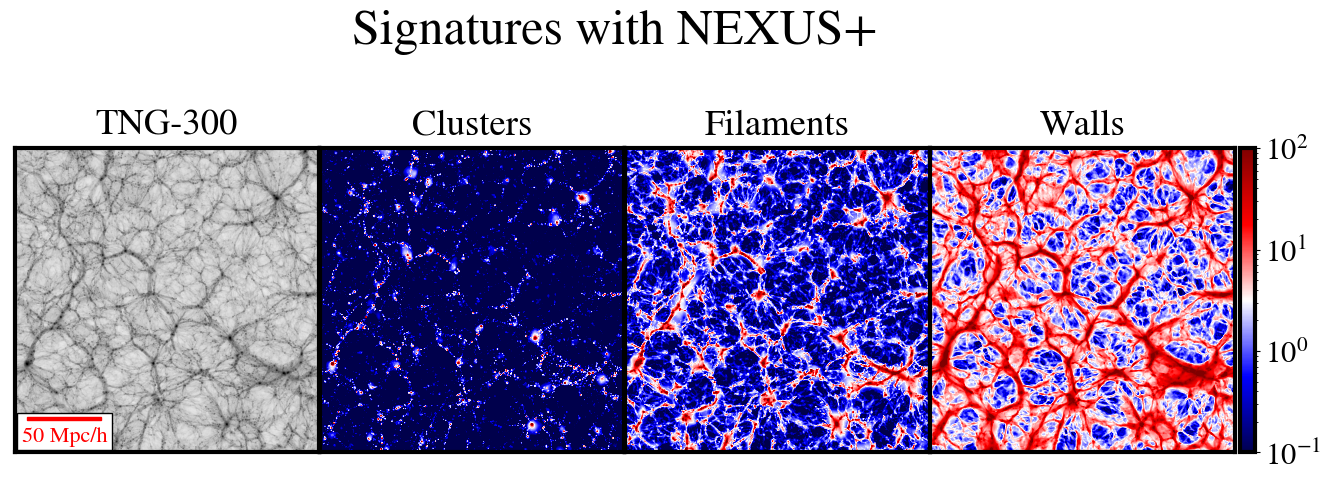

In [54]:

# plt.style.use("light_mode")

# plt.style.use("dark_mode")
# plt.rcParams["axes.linewidth"] = 3

cmap_ = "seismic"
slice = 500:525
sigmax_ = sum(sigmax[:,:,slice,:], dims=3)
den_ = sum(den[:,:,slice], dims=3)

f, axes = plt.subplots(1,4,sharey=true, gridspec_kw = Dict("wspace" => -0.06, "hspace" => 0), figsize=(16,6))

f.suptitle("Signatures with NEXUS+", fontsize=36)

axes[1].set_title("TNG-300", pad=10)
im1 = axes[1].imshow(den_[:,:,1], origin="lower", cmap="Greys", 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=10000.0))

divider1 = axgrid.make_axes_locatable(axes[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cax1.set_axis_off()


axes[2].set_title("Clusters", pad=10)
im2 = axes[2].imshow(sigmax_[:,:,1,1], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))

divider2 = axgrid.make_axes_locatable(axes[2])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cax2.set_axis_off()

axes[3].set_title("Filaments", pad=10)
im3 = axes[3].imshow(sigmax_[:,:,1,2], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))
divider3 = axgrid.make_axes_locatable(axes[3])
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cax3.set_axis_off()

axes[4].set_title("Walls", pad=10)
im4 = axes[4].imshow(sigmax_[:,:,1,3], origin="lower", cmap=cmap_, 
    extent=(0,config["xmax"]/1000,0,config["xmax"]/1000), norm=mpl.colors.LogNorm(vmin=0.1, vmax=100.0))
divider4 = axgrid.make_axes_locatable(axes[4])
cax4 = divider4.append_axes("right", size="5%", pad=0.05)



for ax in axes
    ax.set_aspect("equal")
    # if ax == axes[1]
    #     ax.set_xlabel("x [Mpc/h]")
    #     ax.set_ylabel("y [Mpc/h]")
    # else
    ax.set_xticks([])
    ax.set_yticks([])
    # end
        
end

scalebar1 = ac.AnchoredSizeBar(axes[1].transData,
                           50, "50 Mpc/h", "lower left", 
                           pad=0.2,
                           color="red",
                           frameon=true,
                           size_vertical=2,
                           fontproperties=fontprops, sep=4)
# scalebar2 = ac.AnchoredSizeBar(axes[2].transData,
#                            50, "50 Mpc/h", "lower left", 
#                            pad=0.2,
#                            color="white",
#                            frameon=false,
#                            size_vertical=2,
#                            fontproperties=fontprops)
# scalebar3 = ac.AnchoredSizeBar(axes[3].transData,
#                            50, "50 Mpc/h", "lower left", 
#                            pad=10.5,
#                            color="white",
#                            frameon=false,
#                            size_vertical=2,
#                            fontproperties=fontprops)

axes[1].add_artist(scalebar1)
# axes[2].add_artist(scalebar2)
# axes[3].add_artist(scalebar3)
cbar = plt.colorbar(im4, cax=cax4)
# cbar.ax.get_yaxis().labelpad = 35
# cbar.ax.set_ylabel("Signature Strength", fontsize=30, rotation=-90)
f.tight_layout()
# plt.savefig("final_NEXUSPLUS_Signatures_hydro.png", dpi=300, bbox_inches="tight")
plt.show()

# Let's Determine Structure Types using Tagging

In [50]:
#reduce size of sigmax for example
sigmax = sigmax[1:512, 1:512, 1:512, :]

In [9]:
#load in data and reduce size for example
@load config["input_directory"] * config["run_name"] * ".jld2" den

1-element Vector{Symbol}:
 :den

### Import CosmoMMF

In [56]:
using CosmoMMF

In [ ]:
@time clusbool, filbool, wallbool, S_fil, dM2_fil, S_wall, dM2_wall = CosmoMMF.calc_structure_bools(mass_of_average_cell, 240.0, 
                                                                                                    sigmax_NEXUS, sigmax_NEXUSPLUS, den)

print("Generating Different Structure Boolean Filters")

## Plot Results!

In [3]:
@load "/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_all_species_cluster_bool_filter.jld2" clusbool
@load "/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_all_species_filament_bool_filter.jld2" filbool
@load "/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_all_species_wall_bool_filter.jld2" wallbool

clusbool_full = clusbool
filbool_full = filbool
wallbool_full = wallbool

@load "/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_dm_cluster_bool_filter.jld2" clusbool
@load "/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_dm_filament_bool_filter.jld2" filbool
@load "/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/heavy_halos/density_cube_snap_099_full_1024_dm_wall_bool_filter.jld2" wallbool

clusbool_dm = clusbool
filbool_dm = filbool
wallbool_dm = wallbool

print("load succesful")

load succesful

In [5]:
@load config["input_directory"] * config["run_name"] * ".jld2" den

1-element Vector{Symbol}:
 :den

In [14]:
# a = 0:9  # don't use collect
# 0:9

test = ifelse.(clusbool_dm .== 0, nothing, clusbool_dm)

1024×1024×1024 Array{Union{Nothing, Bool}, 3}:
[:, :, 1] =
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  …  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing     n

In [15]:
plt.imshow(test[:,:,1019], cmap="Reds", vmin=0, vmax=1.0)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /global/homes/j/james12/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError('Image data of dtype object cannot be converted to float')
  File "/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2730, in imshow
    **kwargs)
  File "/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/matplotlib/__init__.py", line 1447, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 5523, in imshow
    im.set_data(X)
  File "/global/homes/j/james12/.conda/envs/baryon_env/lib/python3.7/site-packages/matplotlib/image.py", line 703, in set_data
    "float".format(self._A.dtype))


In [8]:
none = zeros((1024,1024, 1024))

1024×1024×1024 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

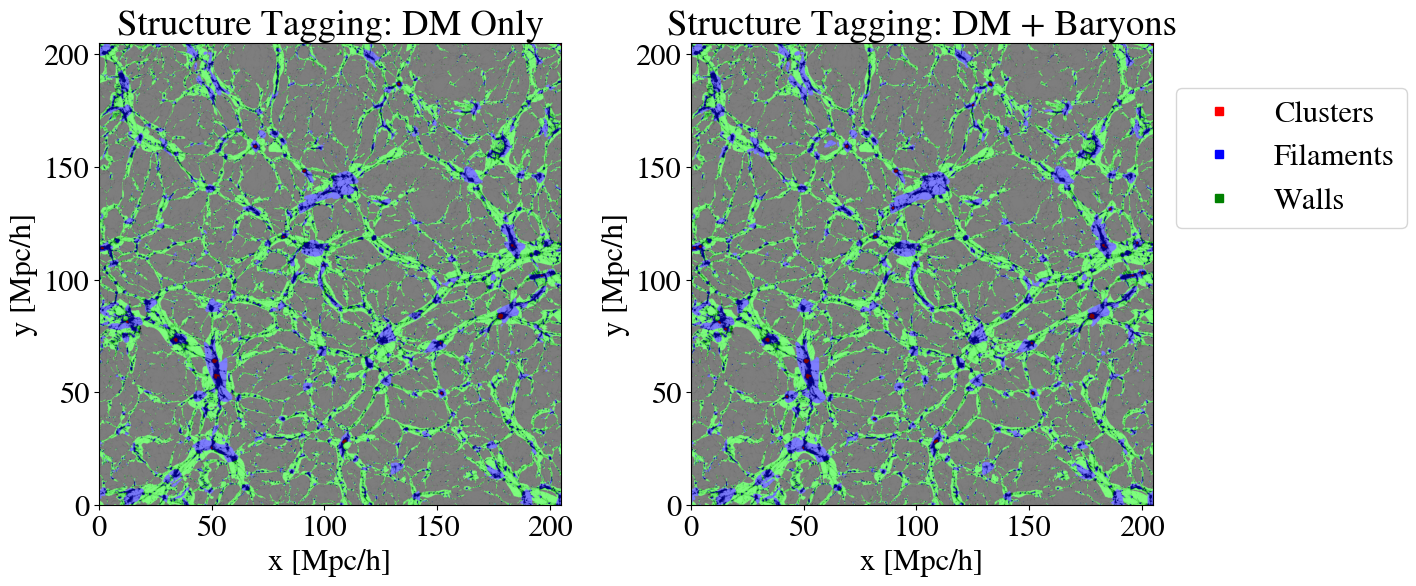

In [23]:

plt.style.use("default")
plt.style.use("light_mode")
# plt.rc("font", family="STIXGeneral")
# plt.rc("font", size=22)
# plt.rc("mathtext", fontset="stix")

fig, axes = subplots(1,2,figsize=(14,6))

slice = 1019
densq = -clamp.(den[:,:,slice], 0, 3)/3 .+ 1 # density plot
densq ./= 2


axes[1].set_title("Structure Tagging: DM Only")
axes[1].set_xlabel("x [Mpc/h]")
axes[1].set_ylabel("y [Mpc/h]")

axes[1].imshow(  cat( [
            transpose(clamp.(densq + (clusbool_dm[:,:,slice]) / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool_dm[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool_dm[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) ,
            origin="lower", extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))






axes[2].set_title("Structure Tagging: DM + Baryons")
axes[2].set_xlabel("x [Mpc/h]")
axes[2].set_ylabel("y [Mpc/h]")

axes[2].imshow(  cat( [
            transpose(clamp.(densq + clusbool_full[:,:,slice] / 2, 0.0,1.0)), 
            transpose(clamp.(densq + wallbool_full[:,:,slice] / 2, 0.0, 1.0)),
            transpose(clamp.(densq + filbool_full[:,:,slice] / 2, 0.0, 1.0))]..., dims=3) ,
            origin="lower", extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

# axes[2].imshow(  cat( [
#             transpose(clamp.(clusbool_full[:,:,slice] / 2 .+ 0.25, 0.0,1.0)), 
#             transpose(clamp.(wallbool_full[:,:,slice] / 2 .+ 0.25, 0.0, 1.0)),
#             transpose(clamp.(filbool_full[:,:,slice] / 2 .+ 0.25, 0.0, 1.0))]..., dims=3) ,
#             origin="lower", extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))







# ax.imshow(wallbool[:,:,slice], cmap="Greens")
# ax.imshow(filbool[:,:,slice], cmap="Blues")
# ax.imshow(clusbool[:,:,slice], cmap="Reds")

# plt.axvline()

axes[2].plot([],[],"rs", label="Clusters")
axes[2].plot([],[], "bs", label="Filaments")
axes[2].plot([],[], "gs", label="Walls")
axes[2].legend(loc=(1.05,0.6))
# plt.savefig("../../../../Images/NEXUSPLUS_Full_Species_all_components_darkmode.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
clusbool[:10,:10,:10]

false

In [22]:
n_clus = sum(clusbool)

1467

In [23]:
n_fil = sum(filbool)

119951534

In [24]:
n_wall = sum(wallbool)

273308544

In [28]:
print(n_clus / 1024^3)
print("\n")
print(n_fil / 1024^3)
print("\n")
print(n_wall / 1024^3)

1.366250216960907e-6
0.11171357147395611
0.2545384168624878

In [34]:
findall(clusbool .== 1)

1467-element Vector{CartesianIndex{3}}:
 CartesianIndex(281, 246, 16)
 CartesianIndex(280, 247, 16)
 CartesianIndex(281, 247, 16)
 CartesianIndex(38, 1008, 16)
 CartesianIndex(37, 1009, 16)
 CartesianIndex(38, 1009, 16)
 CartesianIndex(280, 246, 17)
 CartesianIndex(281, 246, 17)
 CartesianIndex(280, 247, 17)
 CartesianIndex(281, 247, 17)
 CartesianIndex(282, 247, 17)
 CartesianIndex(280, 248, 17)
 CartesianIndex(281, 248, 17)
 ⋮
 CartesianIndex(890, 418, 1018)
 CartesianIndex(888, 419, 1018)
 CartesianIndex(889, 419, 1018)
 CartesianIndex(890, 419, 1018)
 CartesianIndex(889, 420, 1018)
 CartesianIndex(256, 319, 1019)
 CartesianIndex(257, 319, 1019)
 CartesianIndex(256, 320, 1019)
 CartesianIndex(257, 320, 1019)
 CartesianIndex(256, 319, 1020)
 CartesianIndex(257, 319, 1020)
 CartesianIndex(257, 320, 1020)